In [1]:
import csv
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Ex 1.a

In [2]:
df = pd.read_csv("date_promovare_examen.csv")

counts = df['Promovare'].value_counts()
print("Distributia claselor (Promovare):")
print(counts)

if counts[0] == counts[1]:
    print("Datele sunt perfect balansate")
else:
    print("Datele nu sunt perfect balansate, dar verificam daca diferenta este semnificativa")

X_studiu = df['Ore_Studiu'].values
X_somn = df['Ore_Somn'].values
y_obs = df['Promovare'].values

with pm.Model() as logistic_model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_studiu = pm.Normal('beta_studiu', mu=0, sigma=10)
    beta_somn = pm.Normal('beta_somn', mu=0, sigma=10)

    mu = alpha + beta_studiu * X_studiu + beta_somn * X_somn

    p = pm.math.sigmoid(mu)

    y = pm.Bernoulli('y', p=p, observed=y_obs)

    idata = pm.sample(1000, return_inferencedata=True, progressbar=True)

summary = az.summary(idata)
print("\nRezumatul parametrilor modelului:")
print(summary)

Distributia claselor (Promovare):
Promovare
1    250
0    250
Name: count, dtype: int64
Datele sunt perfect balansate


Output()

ERROR:pymc.stats.convergence:There were 195 divergences after tuning. Increase `target_accept` or reparameterize.



Rezumatul parametrilor modelului:
               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       -29.555  4.755 -38.192  -21.019      0.235    0.142     413.0   
beta_somn     3.172  0.837   1.857    4.888      0.042    0.027     416.0   
beta_studiu   2.334  0.926   0.672    3.987      0.047    0.031     395.0   

             ess_tail  r_hat  
alpha           511.0   1.00  
beta_somn       564.0   1.00  
beta_studiu     328.0   1.01  


ex 1.b


Coeficienti medii:
Alpha: -29.555
Beta Studiu: 2.334
Beta Somn: 3.172


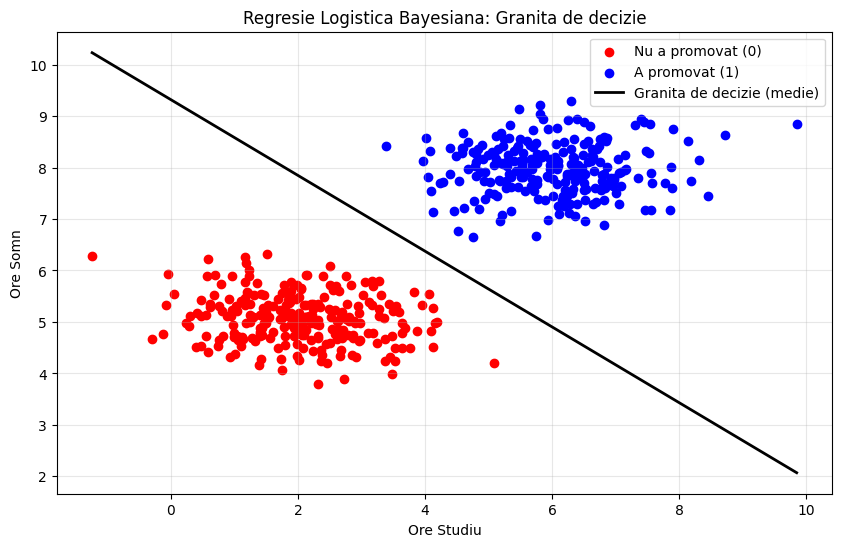

In [3]:
post = idata.posterior
alpha_mean = post['alpha'].mean().item()
beta_studiu_mean = post['beta_studiu'].mean().item()
beta_somn_mean = post['beta_somn'].mean().item()

print(f"\nCoeficienti medii:")
print(f"Alpha: {alpha_mean:.3f}")
print(f"Beta Studiu: {beta_studiu_mean:.3f}")
print(f"Beta Somn: {beta_somn_mean:.3f}")


x_plot = np.linspace(df['Ore_Studiu'].min(), df['Ore_Studiu'].max(), 100)
y_plot = -(alpha_mean + beta_studiu_mean * x_plot) / beta_somn_mean

plt.figure(figsize=(10, 6))

plt.scatter(df[df['Promovare']==0]['Ore_Studiu'], df[df['Promovare']==0]['Ore_Somn'],
            color='red', label='Nu a promovat (0)')
plt.scatter(df[df['Promovare']==1]['Ore_Studiu'], df[df['Promovare']==1]['Ore_Somn'],
            color='blue', label='A promovat (1)')

plt.plot(x_plot, y_plot, color='black', linewidth=2, label='Granita de decizie (medie)')

plt.xlabel('Ore Studiu')
plt.ylabel('Ore Somn')
plt.title('Regresie Logistica Bayesiana: Granita de decizie')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ex 1.c

In [5]:
if abs(beta_studiu_mean) > abs(beta_somn_mean):
    print("Variabila 'Ore Studiu' are un coeficient mai mare (in valoare absoluta), deci influenteaza mai mult")
else:
    print("Variabila 'Ore Somn' are un coeficient mai mare, deci influenteaza mai mult")



Variabila 'Ore Somn' are un coeficient mai mare, deci influenteaza mai mult
